<a href="https://colab.research.google.com/github/mayankshouche/DSLabFinalProject/blob/main/EDA_and_Topic_Modeling_of_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns to add:

1. Try LDA Get the topics of the model
<!-- 2. Get the sentiment of the text and add that as a feature -->
3. add important bigrams as columns, e.g. 'trump administration'
<!-- 6. possibly hashtag -->
7. Look at tweet @ after certain date to see if joebiden gets retweeted, if topics changed a lot after certain dates\
8. Number the text.contains()/is_topic so that we can one-hot-encode them

process_input():
- add the respective features
- apply the preprocessing methods used in training

10. Use XGBoost/Training on Top of BERT





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/'EE 460J'

 2010.00600.pdf				 tweets_3k.csv
 2020_labled_political_tweets.csv.zip	'Twitter API Keys.gdoc'
 290_tweets_with_labels.csv		'USElection Data Set Explanation_2.pdf'
'460J Final Project Links.docx'		 uselection_tweets_1jul_11nov.zip
 Brainstorm.gdoc			 X_train.csv.zip
'Copy of finetuned_BERT_epoch_2.model'	 X_val.csv.zip
'Data Collection.ipynb'			 y_train.csv.zip
 election_tweet_ids_pls_hydrate.txt	 y_val.csv.zip
'Lab 5.gdoc'


In [ ]:
import pandas as pd

X_train = pd.read_csv("/content/drive/MyDrive/EE 460J/X_train.csv.zip")
X_val = pd.read_csv("/content/drive/MyDrive/EE 460J/X_val.csv.zip")
y_train = pd.read_csv("/content/drive/MyDrive/EE 460J/y_train.csv.zip")
y_val = pd.read_csv("/content/drive/MyDrive/EE 460J/y_val.csv.zip")


In [ ]:
# y_val["party"].value_counts()
len(y_val)+len(y_train)

595250

In [ ]:
X_train.head()

,Unnamed: 0,Unnamed: 0.1,id,screen_name,user_id,time,link,text,source
0,533000,3032,1318299678727938048,SenateGOP,14344823,2020-10-19T17:15:10-04:00,https://www.twitter.com/SenateGOP/statuses/131...,✓ Help for schools\n \n✓ Another round of PPP\...,Twitter Media Studio
1,299986,938,1269804019364618240,RepTedDeutch,137794015,2020-06-07T21:30:44-04:00,https://www.twitter.com/RepTedDeutch/statuses/...,George Floyd\nAhmaud Arbery\nBreonna Taylor\n\...,Twitter for iPhone
2,28058,2475,1219714673676836864,SenateDems,73238146,2020-01-21T15:13:34-05:00,https://www.twitter.com/SenatorCarper/statuses...,RT @SenatorCarper I support @SenSchumer's effo...,TweetDeck
3,456505,1308,1301945685315670016,RepSarbanes,364415553,2020-09-04T14:10:15-04:00,https://www.twitter.com/RepSarbanes/statuses/1...,For individuals living with opioid addiction a...,Twitter Web App
4,390712,2467,1287879573724520448,RepMarciaFudge,153486399,2020-07-27T18:36:32-04:00,https://www.twitter.com/RepMarciaFudge/statuse...,"Tomorrow, I will chair a Subcommittee on Elect...",Twitter Web App


In [ ]:
train = [X_train, y_train['party']]
dataset = pd.concat(train, axis=1)
dataset.head()

,Unnamed: 0,Unnamed: 0.1,id,screen_name,user_id,time,link,text,source,party
0,533000,3032,1318299678727938048,SenateGOP,14344823,2020-10-19T17:15:10-04:00,https://www.twitter.com/SenateGOP/statuses/131...,✓ Help for schools\n \n✓ Another round of PPP\...,Twitter Media Studio,R
1,299986,938,1269804019364618240,RepTedDeutch,137794015,2020-06-07T21:30:44-04:00,https://www.twitter.com/RepTedDeutch/statuses/...,George Floyd\nAhmaud Arbery\nBreonna Taylor\n\...,Twitter for iPhone,D
2,28058,2475,1219714673676836864,SenateDems,73238146,2020-01-21T15:13:34-05:00,https://www.twitter.com/SenatorCarper/statuses...,RT @SenatorCarper I support @SenSchumer's effo...,TweetDeck,D
3,456505,1308,1301945685315670016,RepSarbanes,364415553,2020-09-04T14:10:15-04:00,https://www.twitter.com/RepSarbanes/statuses/1...,For individuals living with opioid addiction a...,Twitter Web App,D
4,390712,2467,1287879573724520448,RepMarciaFudge,153486399,2020-07-27T18:36:32-04:00,https://www.twitter.com/RepMarciaFudge/statuse...,"Tomorrow, I will chair a Subcommittee on Elect...",Twitter Web App,D


# Basic Preprocessing

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p
import re 

def preprocess_tweet(tweet):
  # tweet = tweet['text']
  clean_tweet = tweet.replace('@', '')
  clean_tweet = clean_tweet.replace('#', '')
  clean_tweet = clean_tweet.replace('&', '')
  clean_tweet = re.sub(r'[^A-Za-z0-9.!, ]+', '', clean_tweet)
  return clean_tweet


dataset["clean_text"] = dataset['text'].apply(lambda x: preprocess_tweet(x))

In [ ]:
import preprocessor as p
count = 10
for i,row in dataset.iterrows():
  if count == 0:
    break
  count -=1
  processed_tweet = p.parse(row["text"])
  if processed_tweet.hashtags == None:
    continue
  print((processed_tweet.hashtags[0].match))



#BlackLivesMatter
#coronavirus
#COVID19


In [ ]:
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud,STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color='white'):
    def covid(string):
      if 'covid' in string or 'corona' in string:
        return 'Covid19'
      if 'blacklives' in string or 'lives matter' in string or 'blm' in string:
        return 'BLM'
      return string
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                                and word != 'amp'
                                and word != 'QT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
  

def wordcloud_hashtags(data, color='black'):
    def covid(string):
      if 'covid' in string or 'corona' in string:
        return 'Covid19'
      return string
    words = ' '.join(data)
    processed_tweet = p.parse(words)
    # print(processed_tweet.hashtags)
    # if processed_tweet.hashtags == None:

    cleaned_word = " ".join([word.match for word in processed_tweet.hashtags
                            if word and 'http' not in word.match
                                and word.match != 'RT'
                                and word.match != 'amp'
                                and word.match != 'QT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() 


def wordcloud_mentions(data, color='blue'):
    def covid(string):
      if 'covid' in string or 'corona' in string:
        return 'Covid19'
      return string




    words = ' '.join(data)
    processed_tweet = p.parse(words)
    # print(processed_tweet.hashtags)
    # if processed_tweet.hashtags == None:

    cleaned_word = " ".join([word.match for word in processed_tweet.mentions
                            if word and 'http' not in word.match
                                and word.match != 'RT'
                                and word.match != 'amp'
                                and word.match != 'QT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() 



# Analysis of Democratic Party Tweets

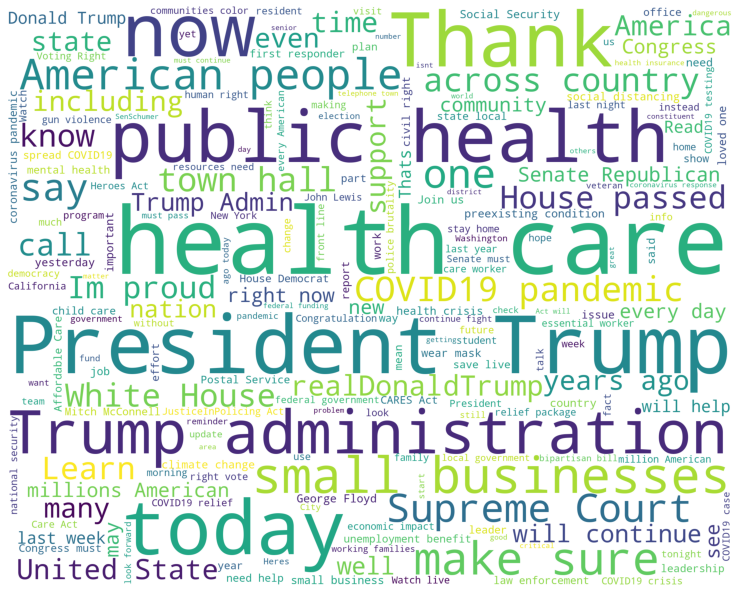

In [ ]:
democrat = dataset[dataset["party"] == 'D']
wordcloud_draw(democrat["clean_text"])

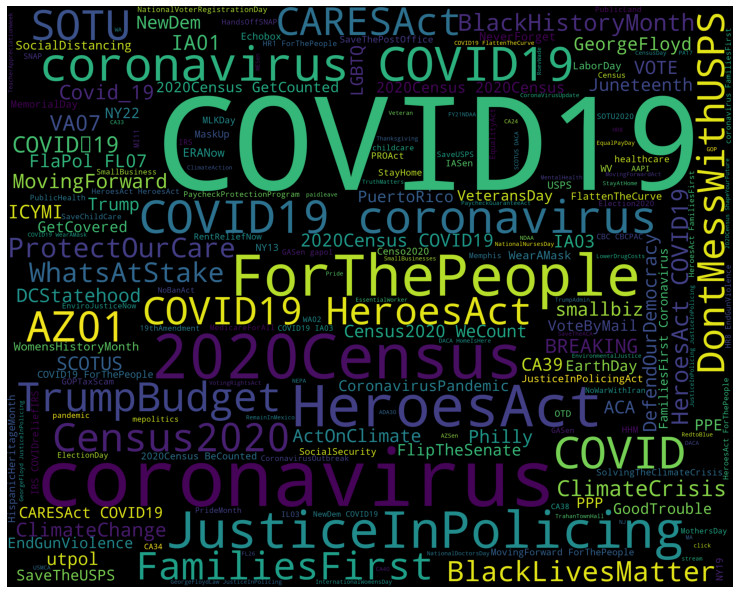

In [ ]:
# democrat = dataset[dataset["party"] == 'D']
wordcloud_hashtags(democrat["text"])

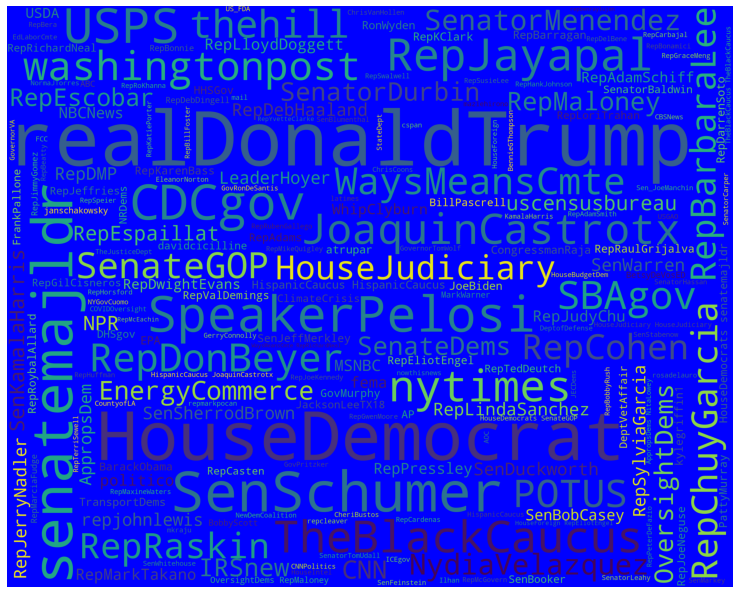

In [ ]:
wordcloud_mentions(democrat["text"])

# Analysis of Republican Party Tweets

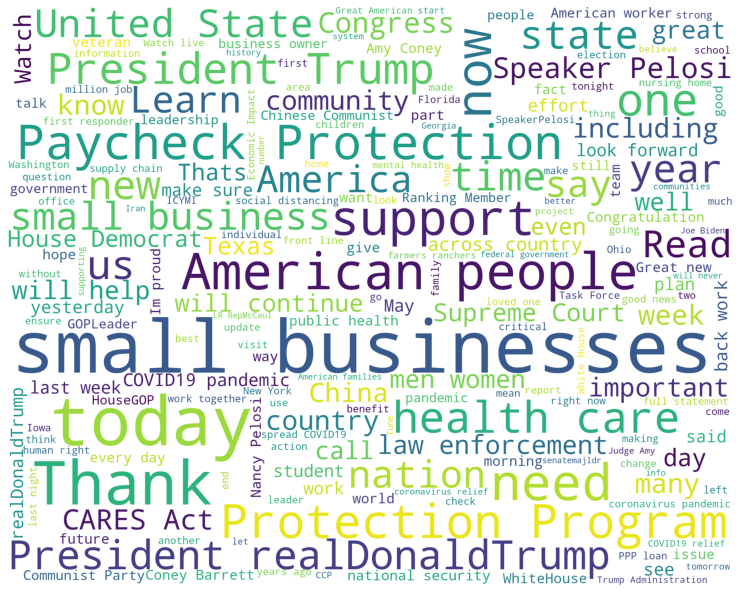

In [ ]:
republican = dataset[dataset["party"] == 'R']
wordcloud_draw(republican["clean_text"])

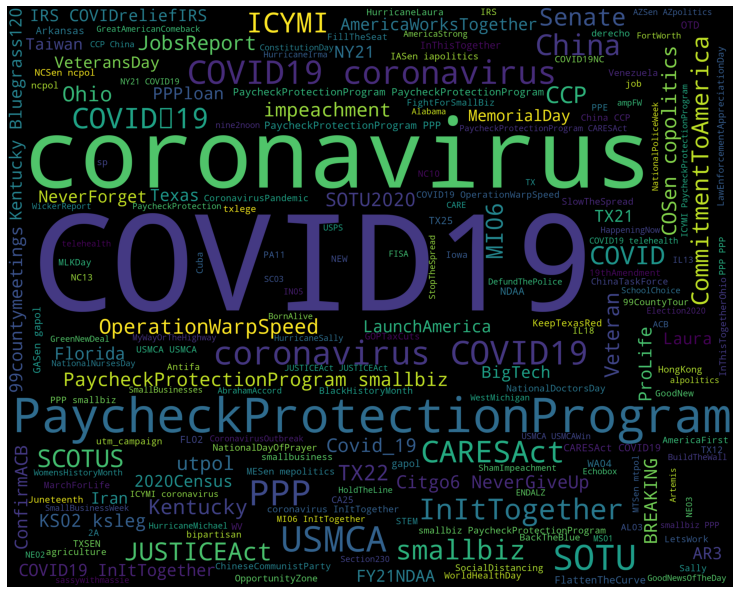

In [ ]:
wordcloud_hashtags(republican["text"])

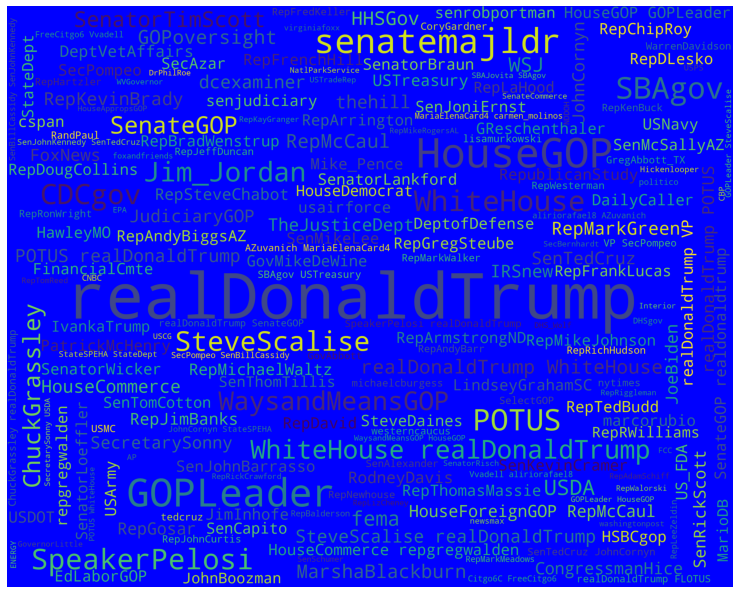

In [ ]:
wordcloud_mentions(republican["text"])

# LDA of Republican Tweets

In [ ]:
# !pip install pyLDAvis
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def get_n_grams(clean_text):
    tokenized_text = [re.sub(r'[^A-Za-z0-9]+-', '', word.lower()) for word in clean_text.split() if word not in set(stop_words) and 'http' not in word and 'jpg' not in word and 'www' not in word and word.lower()!='rt' and word.lower()!='amp']
    for i in range(len(tokenized_text)):
      if 'covid' in tokenized_text[i] or 'corona' in tokenized_text[i]:
        tokenized_text[i] = 'Covid'
      elif 'biden' in tokenized_text[i] or 'joe' in tokenized_text[i]:
        tokenized_text[i] = 'JoeBiden'
      elif 'pelosi' in tokenized_text[i] or 'nancy' in tokenized_text[i]:
        tokenized_text[i] = 'NancyPelosi'     
      elif 'twitter' in  tokenized_text[i]:
        tokenized_text[i]=''
      return ' '.join(tokenized_text)
    # allowed_postags=set(['NOUN', 'ADJ', 'VERB', 'ADV'])
    # doc = nlp(" ".join(tokenized_text)) 
    # return [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    # print(final)

republican["cleaner_text"] = republican["clean_text"].apply(lambda x: get_n_grams(x))



def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

# documents


0         help schools another round ppp unemployment be...
6         va, ssi recipients didnt file tax return 2018 ...
8         republicans spent months fighting covid19 reli...
9         also assault nashville. what attackers dont se...
10        repbrianmast check important tips work togethe...
                                ...                        
476188    the constitution suspended times crisis. attor...
476192    senategop grassleya good judge understands cou...
476194    houseadmngop the iowa dems app issues iowacauc...
476195    in 2011, toni gross son, frank, killed tour af...
476197    .repjamescomer repgrothman repmarkgreen repbob...
Name: cleaner_text, Length: 186220, dtype: object

In [ ]:

documents = [i for i in republican["cleaner_text"].values.tolist() if i ]

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=1000, max_features=no_features, stop_words='english', ngram_range=(1,4))
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names


['000',
 '10',
 '100',
 '12',
 '15',
 '20',
 '2020',
 '30',
 'able',
 'access',
 'accountable',
 'act',
 'action',
 'actions',
 'added',
 'additional',
 'address',
 'administration',
 'ag',
 'agenda',
 'ago',
 'agree',
 'agreement',
 'aid',
 'air',
 'allow',
 'amendment',
 'america',
 'american',
 'american people',
 'american workers',
 'americans',
 'americas',
 'amy',
 'amy coney',
 'amy coney barrett',
 'announced',
 'answer',
 'apply',
 'appreciate',
 'approved',
 'area',
 'asked',
 'assistance',
 'available',
 'away',
 'barrett',
 'begin',
 'believe',
 'benefits',
 'best',
 'better',
 'biden',
 'big',
 'billion',
 'bills',
 'bipartisan',
 'birthday',
 'blocked',
 'brave',
 'breaking',
 'bring',
 'business',
 'businesses',
 'called',
 'calling',
 'calls',
 'campaign',
 'care',
 'cares',
 'cares act',
 'caresact',
 'case',
 'cases',
 'ccp',
 'cdcgov',
 'celebrate',
 'center',
 'chairman',
 'challenges',
 'change',
 'check',
 'child',
 'children',
 'china',
 'chinas',
 'chinese',
 '

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.85, max_features=no_features, stop_words='english', ngram_range=(1,3))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '20',
 '2019',
 '2020',
 '22',
 '25',
 '30',
 '40',
 '50',
 '500',
 'able',
 'abortion',
 'access',
 'accountability',
 'accountable',
 'act',
 'action',
 'actions',
 'actually',
 'added',
 'additional',
 'address',
 'administration',
 'advance',
 'affected',
 'ag',
 'agenda',
 'ago',
 'agree',
 'agreement',
 'agriculture',
 'ahead',
 'aid',
 'air',
 'alaska',
 'allow',
 'allowed',
 'amendment',
 'america',
 'american',
 'american families',
 'american people',
 'american workers',
 'americans',
 'americas',
 'amy',
 'amy coney',
 'amy coney barrett',
 'anniversary',
 'announce',
 'announced',
 'answer',
 'answers',
 'applaud',
 'applications',
 'apply',
 'appreciate',
 'approved',
 'april',
 'area',
 'areas',
 'arent',
 'arkansas',
 'army',
 'ask',
 'asked',
 'asking',
 'assistance',
 'attack',
 'attacks',
 'august',
 'available',
 'award',
 'away',
 'bad',
 'barrett',
 'begin',
 'beginning',
 'believe',
 'benefit',
 'benefits',
 'be

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation


no_topics = 10

# Run NMF

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

print("Done NMF")
 

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)

print('Done')
# display_topics(nmf, tfidf_feature_names, no_top_words)
# print('here')
# display_topics(lda, tf_feature_names, no_top_words)
# no_top_words = 20

# display_topics(nmf, tfidf_feature_names, no_top_words)
# print()
# display_topics(lda, tf_feature_names, no_top_words)

Done NMF
Done


In [ ]:
no_top_words = 20

display_topics(nmf, tfidf_feature_names, no_top_words)
print()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
covid19 coronavirus help information pandemic spread testing response need cdcgov learn covid19 pandemic state visit resources relief vaccine federal china qt
Topic 1:
small businesses small businesses program protection paycheck paycheck protection protection program paycheck protection program ppp business paycheckprotectionprogram loans small business employees workers loan apply sbagov help
Topic 2:
house democrats senate vote impeachment pelosi house democrats republicans qt speaker time congress voting americans partisan dems passed election speaker pelosi gopleader
Topic 3:
today thank day great happy qt honor service years women country nation work national men men women birthday family time safe
Topic 4:
realdonaldtrump president president realdonaldtrump trump whitehouse president trump qt johncornyn america administration signed sotu potus usmca historic peace trade trumps americans impeachment
Topic 5:
american people american people economy work china jobs workers

# LDA of Democratic Tweets

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def get_n_grams(clean_text):
    tokenized_text = [re.sub(r'[^A-Za-z0-9]+-', '', word.lower()) for word in clean_text.split() if word not in set(stop_words) and 'http' not in word and 'jpg' not in word and 'www' not in word and word.lower()!='rt' and word.lower()!='amp']
    for i in range(len(tokenized_text)):
      if 'covid' in tokenized_text[i] or 'corona' in tokenized_text[i]:
        tokenized_text[i] = 'Covid'
      elif 'biden' in tokenized_text[i] or 'joe' in tokenized_text[i]:
        tokenized_text[i] = 'JoeBiden'
      elif 'pelosi' in tokenized_text[i] or 'nancy' in tokenized_text[i]:
        tokenized_text[i] = 'NancyPelosi'     
      elif 'twitter' in  tokenized_text[i]:
        tokenized_text[i]=''
      return ' '.join(tokenized_text)
    # allowed_postags=set(['NOUN', 'ADJ', 'VERB', 'ADV'])
    # doc = nlp(" ".join(tokenized_text)) 
    # return [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    # print(final)

democrat["cleaner_text"] = democrat["clean_text"].apply(lambda x: get_n_grams(x))


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

# documents


NameError: ignored

In [ ]:

documents = [i for i in republican["cleaner_text"].values.tolist() if i ]

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=1000, max_features=no_features, stop_words='english', ngram_range=(1,4))
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.85, max_features=no_features, stop_words='english', ngram_range=(1,3))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation


no_topics = 10

# Run NMF

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

print("Done NMF")


# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)
print('Done')
# display_topics(nmf, tfidf_feature_names, no_top_words)
# print('here')
# display_topics(lda, tf_feature_names, no_top_words)
no_top_words = 20

display_topics(nmf, tfidf_feature_names, no_top_words)
print()
display_topics(lda, tf_feature_names, no_top_words)